In [ ]:
library(Seurat)
library(purrr)
library(dplyr)
library(stringr)
library(harmony)
library(DoubletFinder)
library(ggplot2)
library(ggpubr)
library(plyr)
library(pheatmap)

In [2]:
fibroblast = readRDS('~/HPV/res/public_rna/seurat_rds/annotated/fibroblast.rds')

In [3]:
marker_genes = c('ACTA2','COL4A2','MYH11','MYO1B','HLA-DRA','CXCL14','CXCL12','CCL21','RGS5','FAP','MKI67','PTGDS','CXCL5','MMP11','COL10A1','CXCL10','RGS6','KLF4')

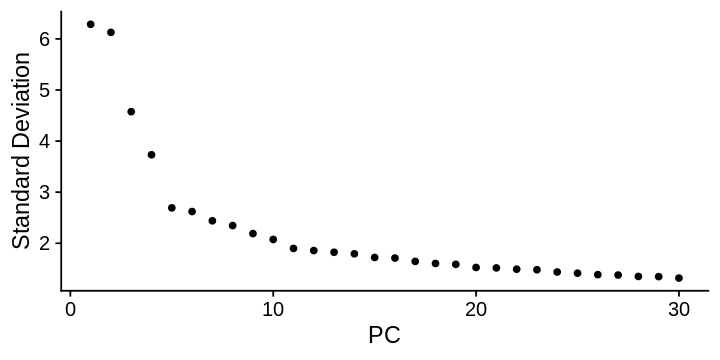

In [4]:
temp = fibroblast
fibroblast = CreateSeuratObject(counts = fibroblast@assays$RNA@counts, project = "fibroblast") %>% 
    NormalizeData(verbose = FALSE) %>%
    FindVariableFeatures(selection.method = "vst", nfeatures = 500)
fibroblast = ScaleData(fibroblast, verbose = FALSE) %>% 
    RunPCA(npcs = 30, verbose = FALSE)
options(repr.plot.width = 6, repr.plot.height = 3)
ElbowPlot(fibroblast,ndims = 30)

In [5]:
fibroblast@meta.data = temp@meta.data
fibroblast = RunHarmony(fibroblast, 'Patient', verbose = FALSE) %>%    
    RunUMAP(reduction = "harmony", dims = 1:11, verbose = FALSE) %>%
    FindNeighbors(reduction = "harmony", dims = 1:11, verbose = FALSE) %>%
    FindClusters(resolution = 1.5, verbose = FALSE)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


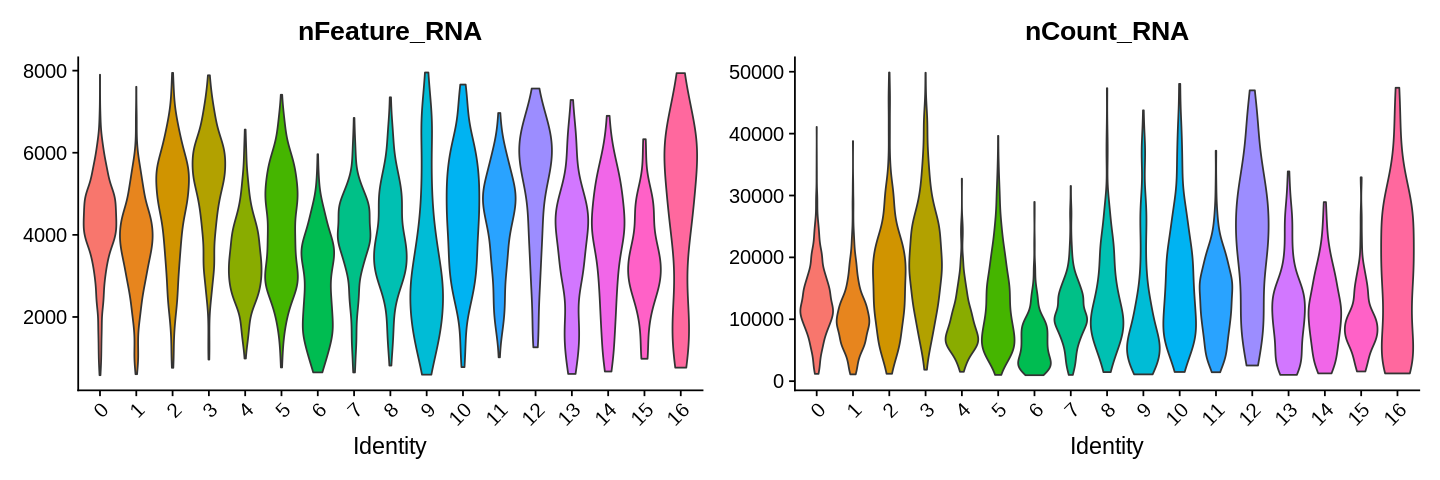

In [6]:
options(repr.plot.width = 12, repr.plot.height = 4)
VlnPlot(fibroblast,features = c("nFeature_RNA", "nCount_RNA"),pt.size = 0)

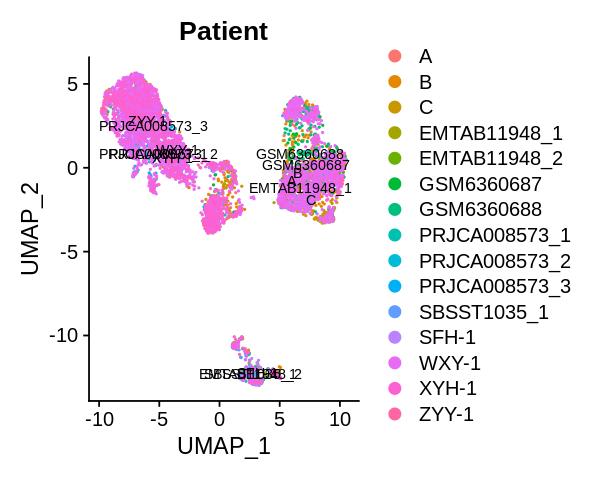

In [7]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(fibroblast, group.by = 'Patient',label = TRUE,label.size = 3)

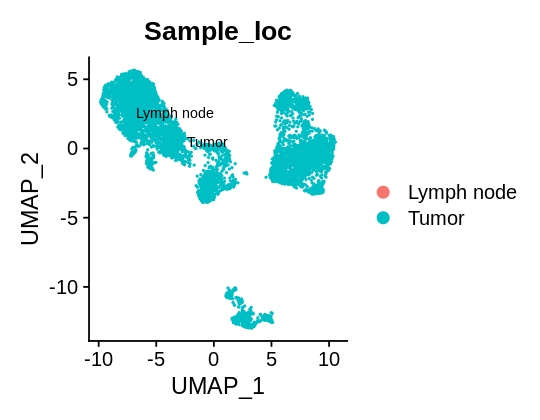

In [8]:
options(repr.plot.width = 4.5, repr.plot.height = 3.5)
DimPlot(fibroblast, group.by = 'Sample_loc',label = TRUE,label.size = 3)

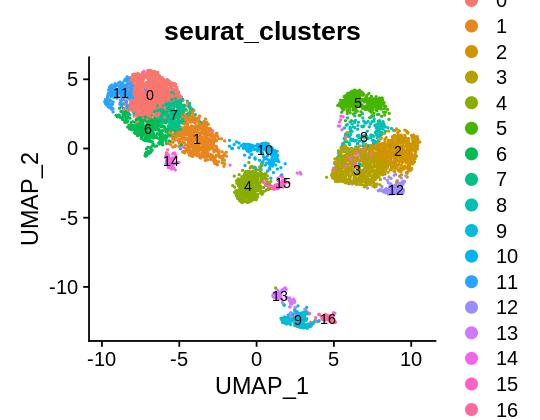

In [9]:
options(repr.plot.width = 4.5, repr.plot.height = 3.5)
DimPlot(fibroblast, group.by = 'seurat_clusters',label = TRUE,label.size = 3)

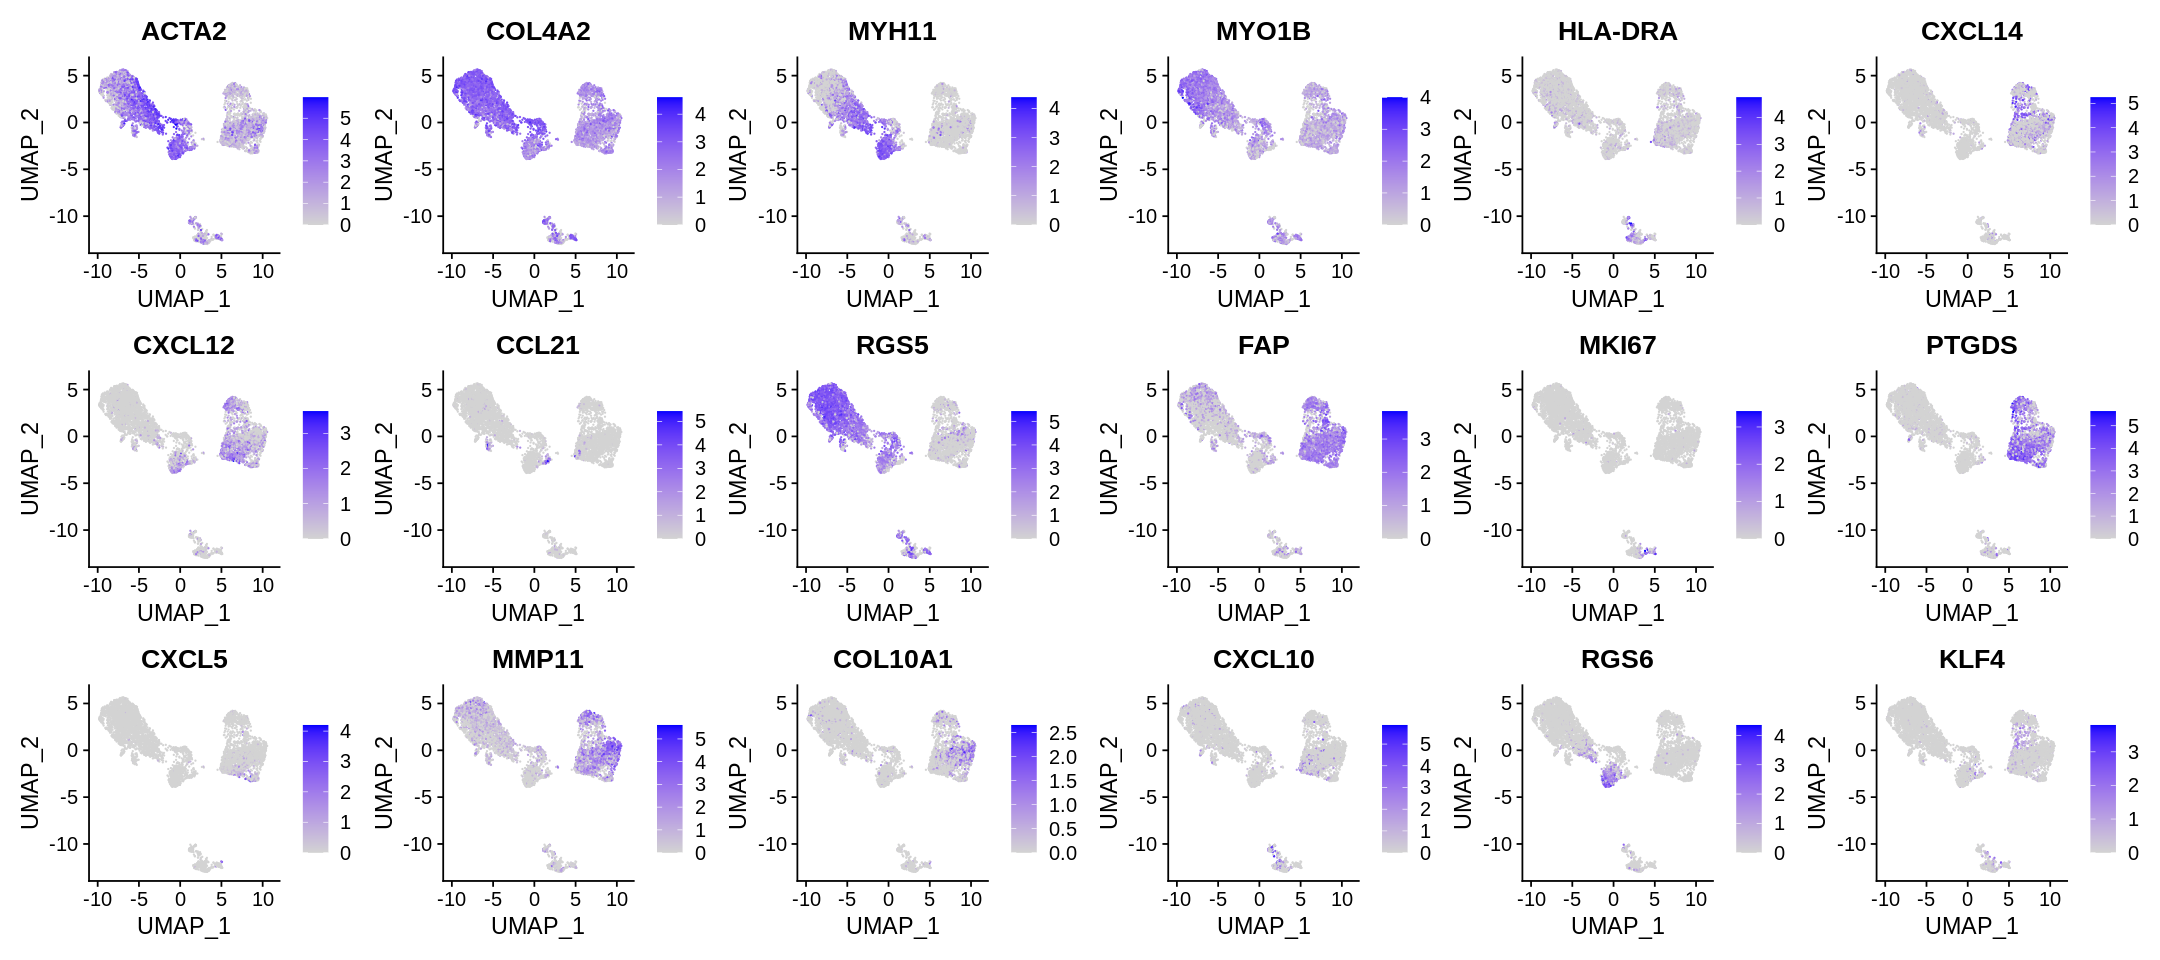

In [10]:
options(repr.plot.width = 18, repr.plot.height = 8)
FeaturePlot(fibroblast,features = c(marker_genes),ncol = 6,pt.size = 0.001)

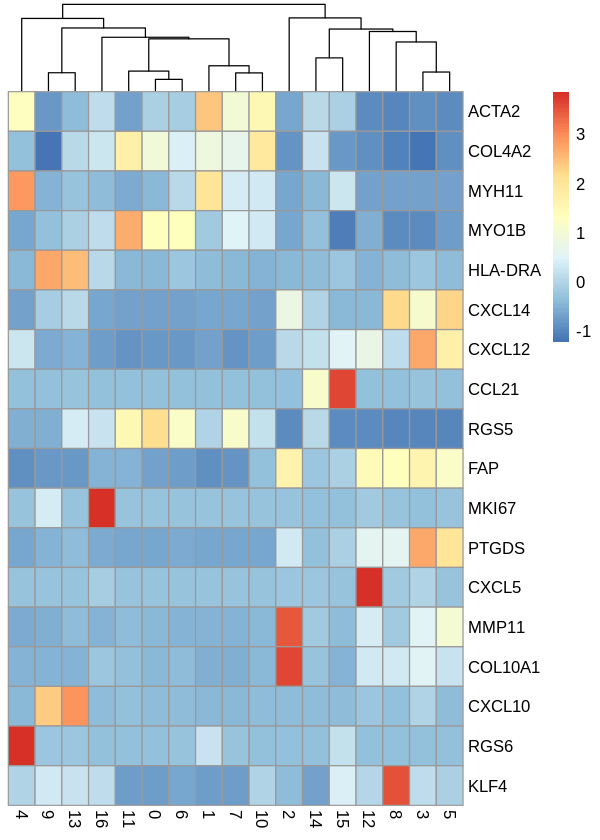

In [11]:
gene_cell_exp <- AverageExpression(fibroblast,
                                   features = c(marker_genes),
                                   group.by = 'seurat_clusters',
                                   slot = 'data') 
gene_cell_exp <- as.data.frame(gene_cell_exp$RNA)
marker_exp <- t(scale(t(gene_cell_exp),scale = T,center = T))
options(repr.plot.width = 5, repr.plot.height = 7)
pheatmap(marker_exp,cluster_rows = FALSE)

In [12]:
other_l = c('CD79A','TPSAB1','LILRA4','COL1A2','KRT5','CD68','CSF3R','LILRA4','CLEC9A','CD1C','LAMP3','KIT')
current_l = c("CD3D","CD3E","CD3G","CD4","CD8A","CD8B","FOXP3","KLRD1","GNLY","KLRK1","NKG7",'NCAM1','FCGR3A','NCR3','TRDV2','MKI67')

Warning message in FeaturePlot(fibroblast, features = c(other_l, current_l), ncol = 6):
“All cells have the same value (0) of LILRA4.”
Warning message in FeaturePlot(fibroblast, features = c(other_l, current_l), ncol = 6):
“All cells have the same value (0) of LILRA4.”
Warning message in FeaturePlot(fibroblast, features = c(other_l, current_l), ncol = 6):
“All cells have the same value (0) of TRDV2.”


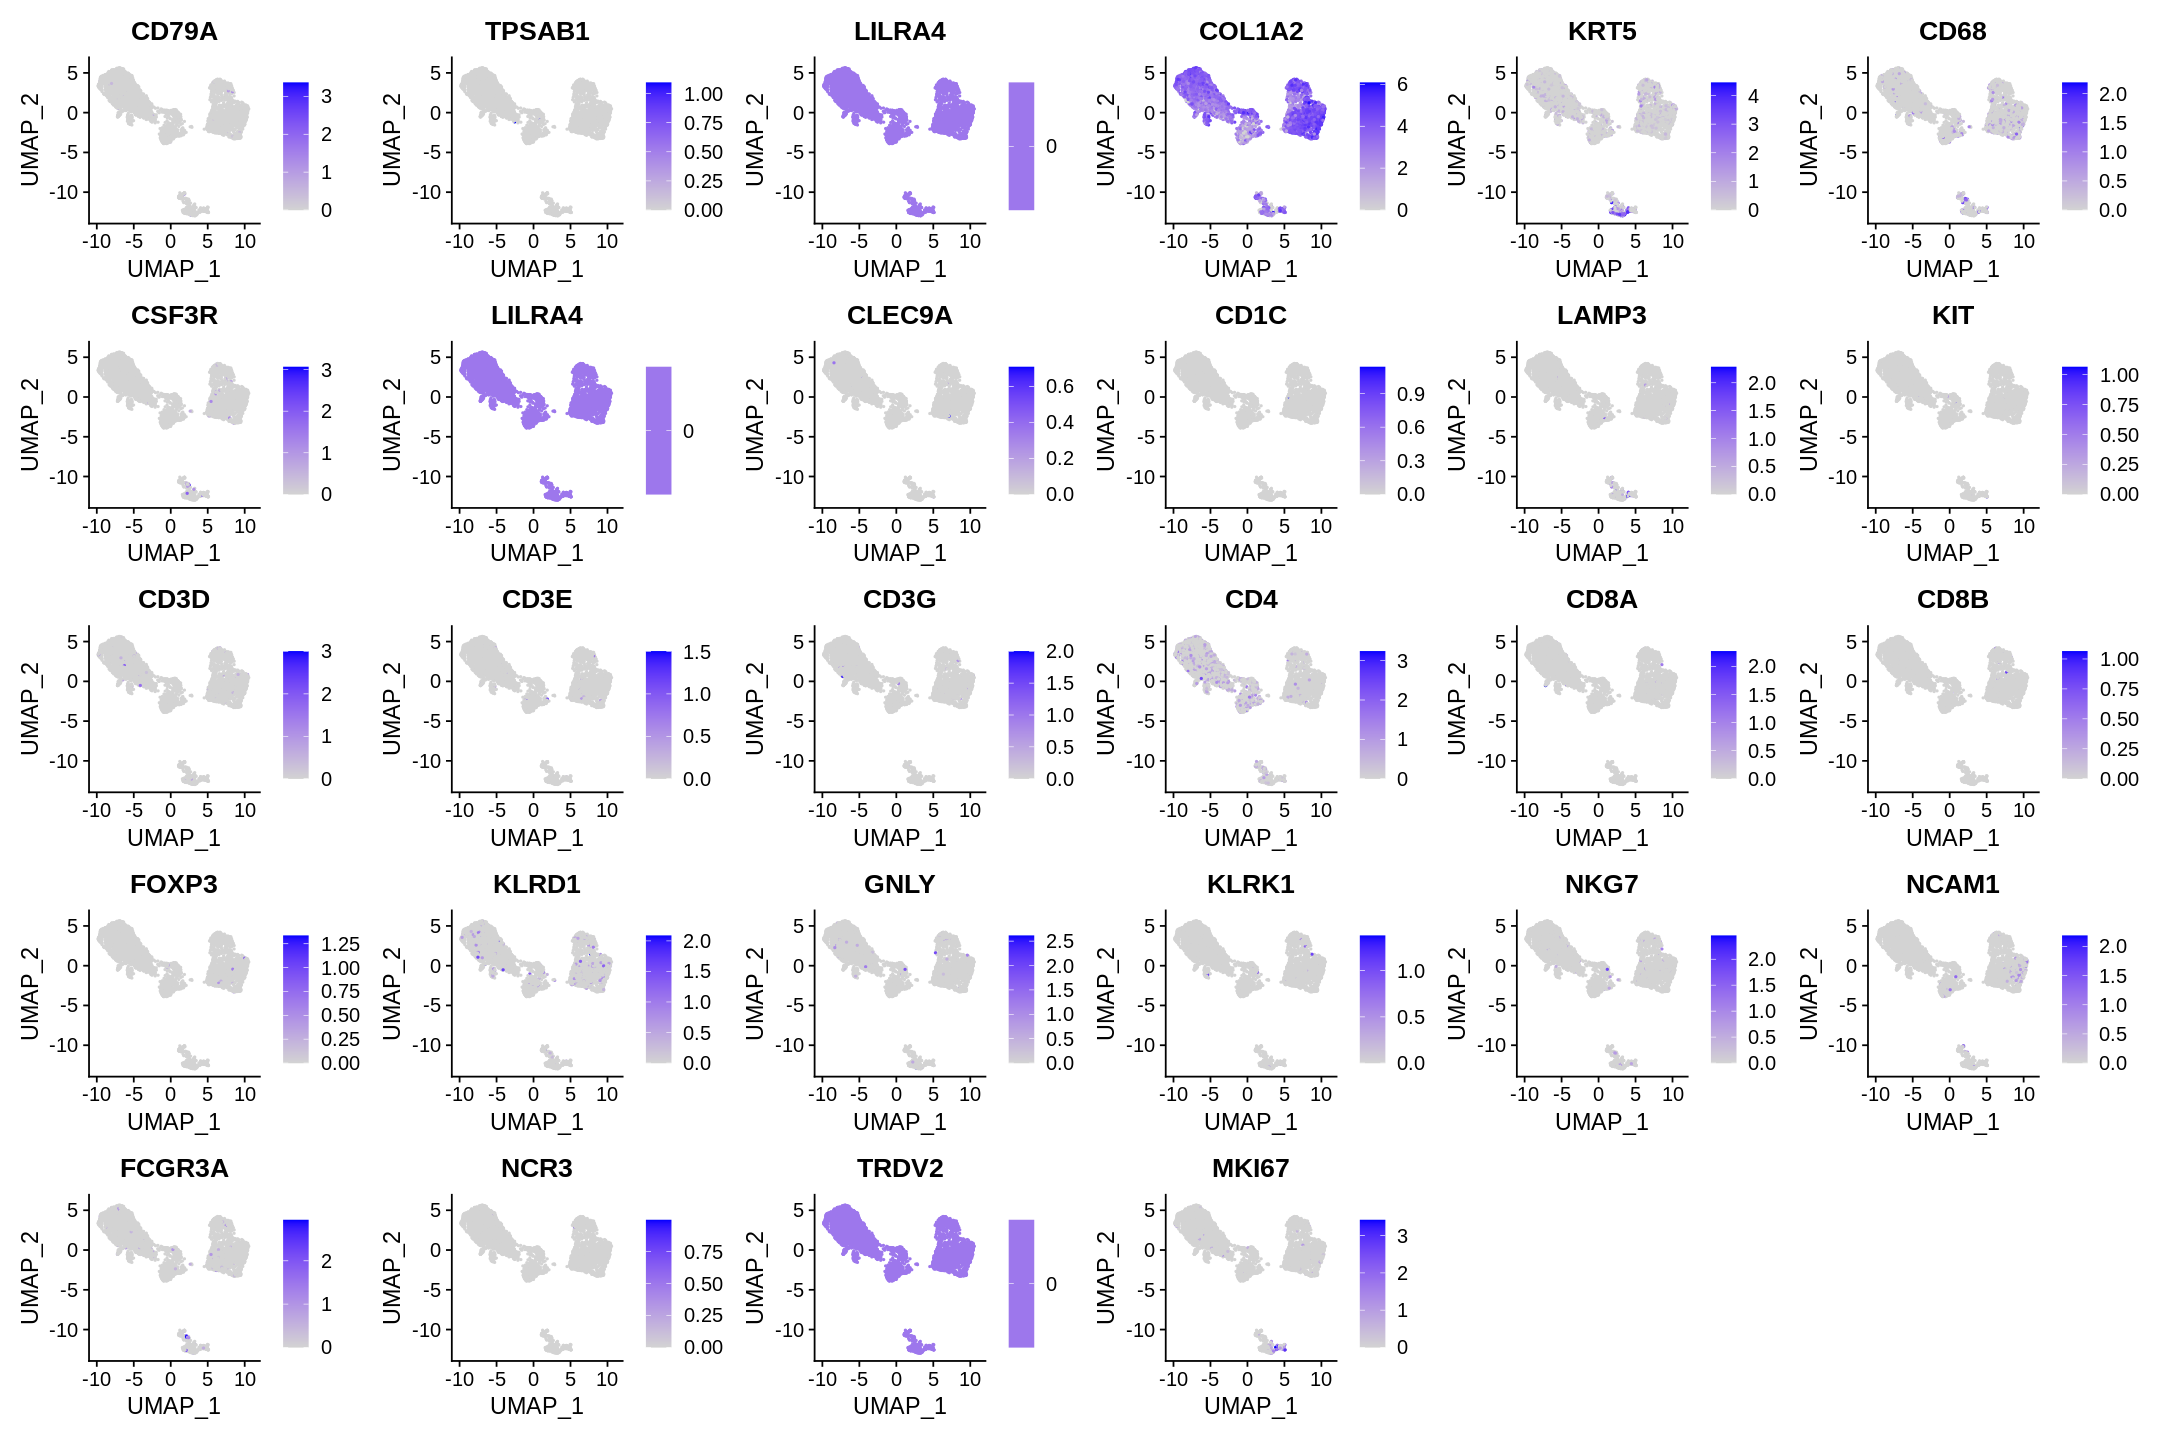

In [13]:
options(repr.plot.width = 18, repr.plot.height = 12)
FeaturePlot(fibroblast,features = c(other_l, current_l),ncol = 6)

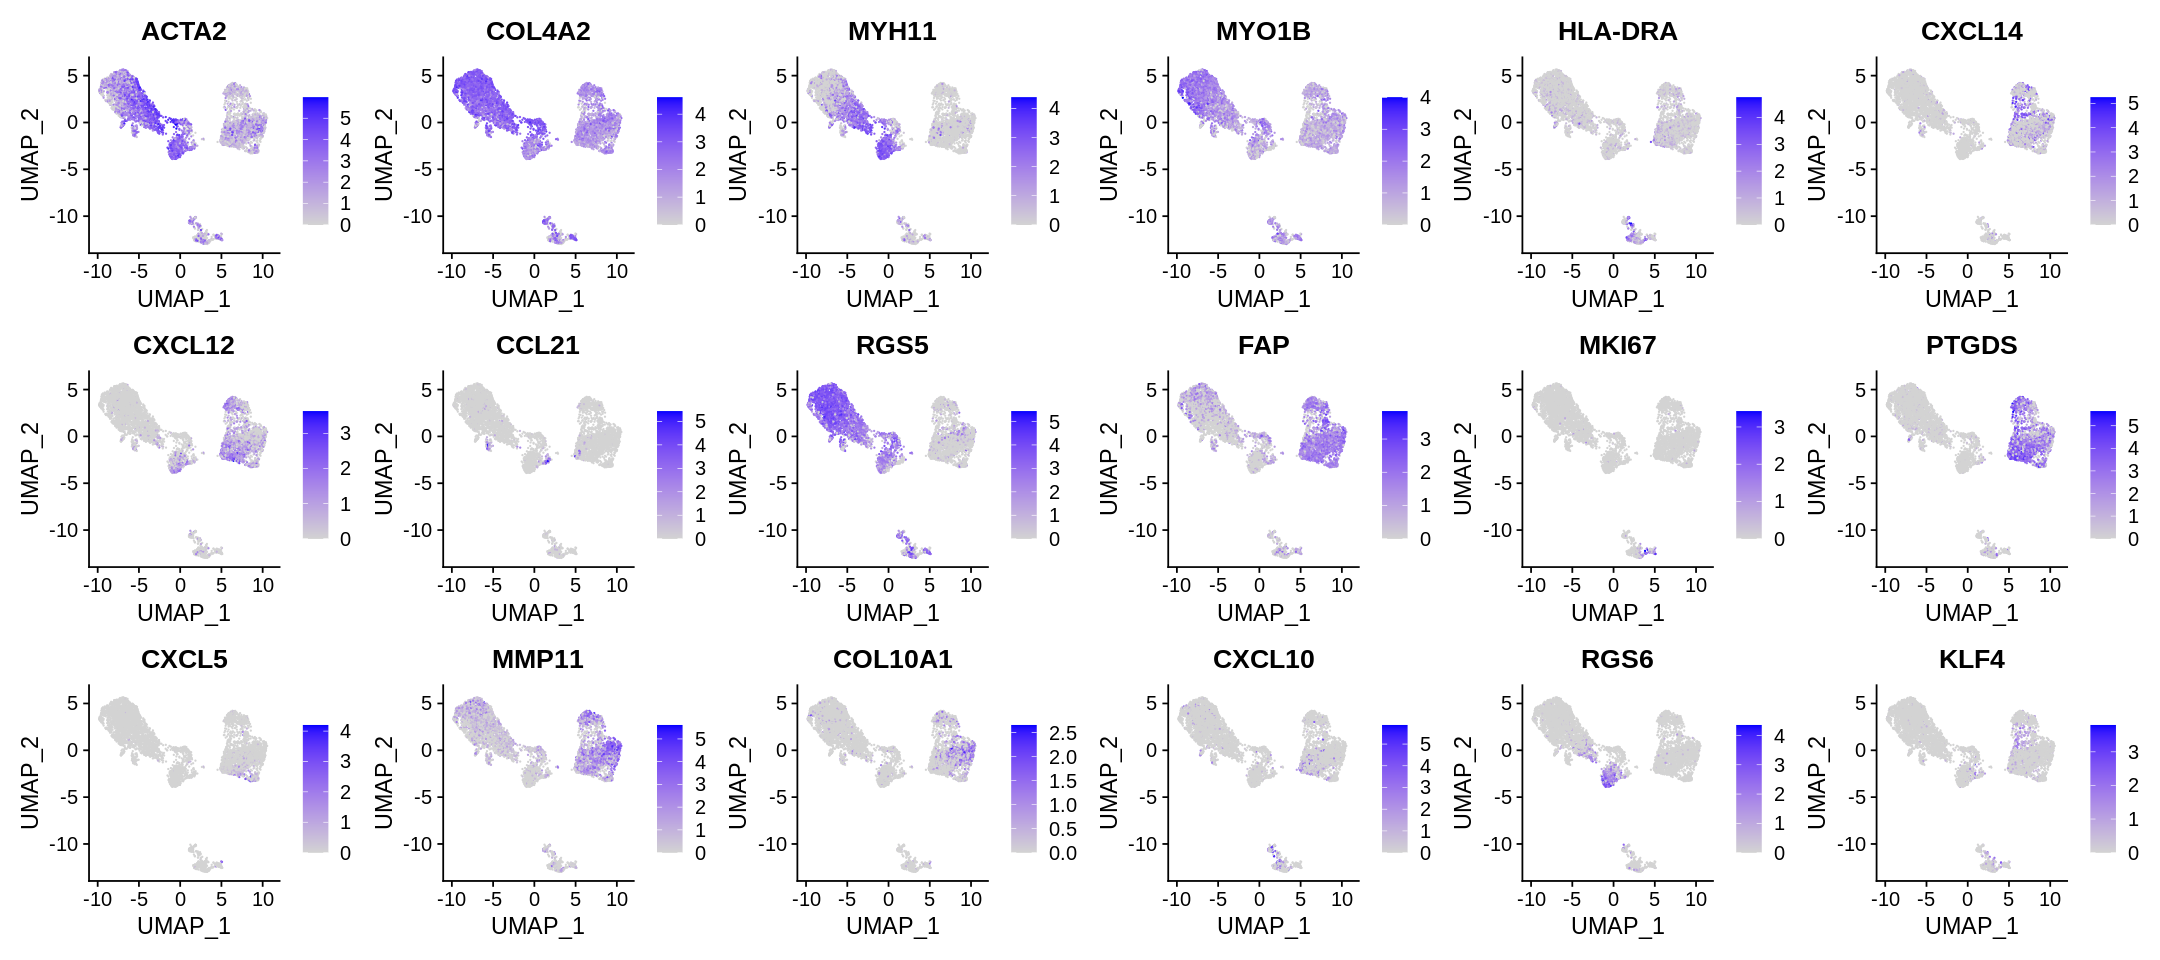

In [14]:
options(repr.plot.width = 18, repr.plot.height = 8)
FeaturePlot(fibroblast,features = c(marker_genes),ncol = 6,pt.size = 0.001)

In [15]:
fibroblast$minor = 'fibroblast'
fibroblast$minor[fibroblast$seurat_clusters %in% c('11','0','6','7','1','10')] = 'CAF_COL4A1'
fibroblast$minor[fibroblast$seurat_clusters %in% c('4')] = 'CAF_RGS6'
fibroblast$minor[fibroblast$seurat_clusters %in% c('14','15')] = 'CAF_CCL21'
fibroblast$minor[fibroblast$seurat_clusters %in% c('5','3')] = 'CAF_CXCL12'
fibroblast$minor[fibroblast$seurat_clusters %in% c('8')] = 'CAF_CXCL14'
fibroblast$minor[fibroblast$seurat_clusters %in% c('2')] = 'CAF_COL10A1'
fibroblast$minor[fibroblast$seurat_clusters %in% c('12')] = 'CAF_CXCL5'
fibroblast$minor[fibroblast$seurat_clusters %in% c('16')] = 'CAF_MKI67'
fibroblast$minor[fibroblast$seurat_clusters %in% c('9','13')] = 'CAF_MHCII'

In [16]:
fibroblast = fibroblast[,fibroblast@assays$RNA@data['KRT5',]==0]

In [17]:
fibroblast$curated = fibroblast$minor

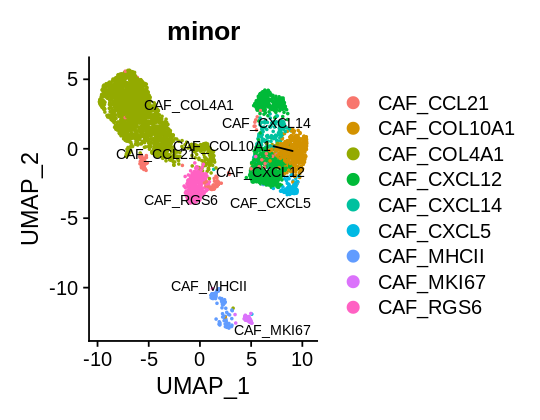

In [18]:
options(repr.plot.width = 4.5, repr.plot.height = 3.5)
DimPlot(fibroblast, group.by = 'minor',label = TRUE,label.size = 3,repel = TRUE)

In [19]:
saveRDS(fibroblast,file = '~/HPV/res/public_rna/seurat_rds/fibroblast.rds')